In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/var/folders/43/b6b58k292659_t5j2lbklx6c0000gn/T/ipykernel_83000/1919724200.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pr_counts = df.set_index('Created At').resample(resample_freq).size()


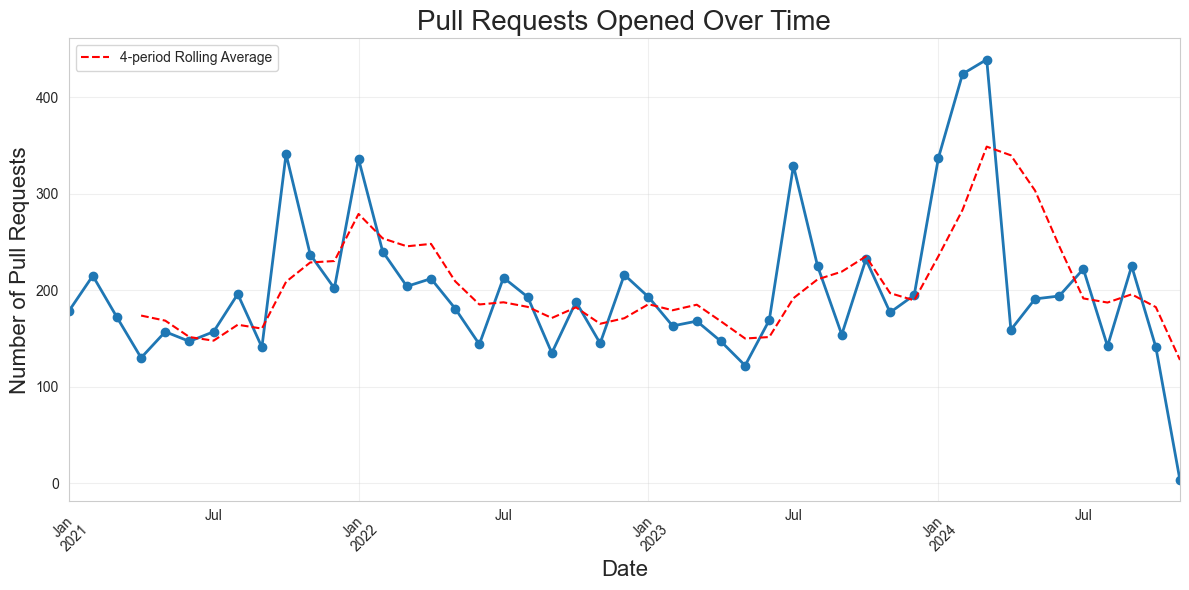

In [3]:
df = pd.read_csv("../data/pull_requests_filtered.csv")

resample_freq='M'
df = df.copy()
df['Created At'] = pd.to_datetime(df['Created At'])

# Count PRs by date and resample
pr_counts = df.set_index('Created At').resample(resample_freq).size()

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot as a line chart with markers
ax = pr_counts.plot(kind='line', marker='o', linewidth=2)

# Add a trend line (rolling average)
window_size = max(3, len(pr_counts) // 10)  # Adaptive window size
if len(pr_counts) > window_size:
    rolling_avg = pr_counts.rolling(window=window_size).mean()
    rolling_avg.plot(ax=ax, color='red', linestyle='--', 
                        label=f'{window_size}-period Rolling Average')

# Set the title and labels
plt.title('Pull Requests Opened Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Pull Requests', fontsize=16)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Tight layout to ensure everything fits
plt.tight_layout()

# plt.savefig('../plot-images/prs_over_time.png')


/var/folders/43/b6b58k292659_t5j2lbklx6c0000gn/T/ipykernel_83000/3055957493.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  decision_time_trend = df.set_index('Created At').resample(resample_freq)['Decision Time'].median()


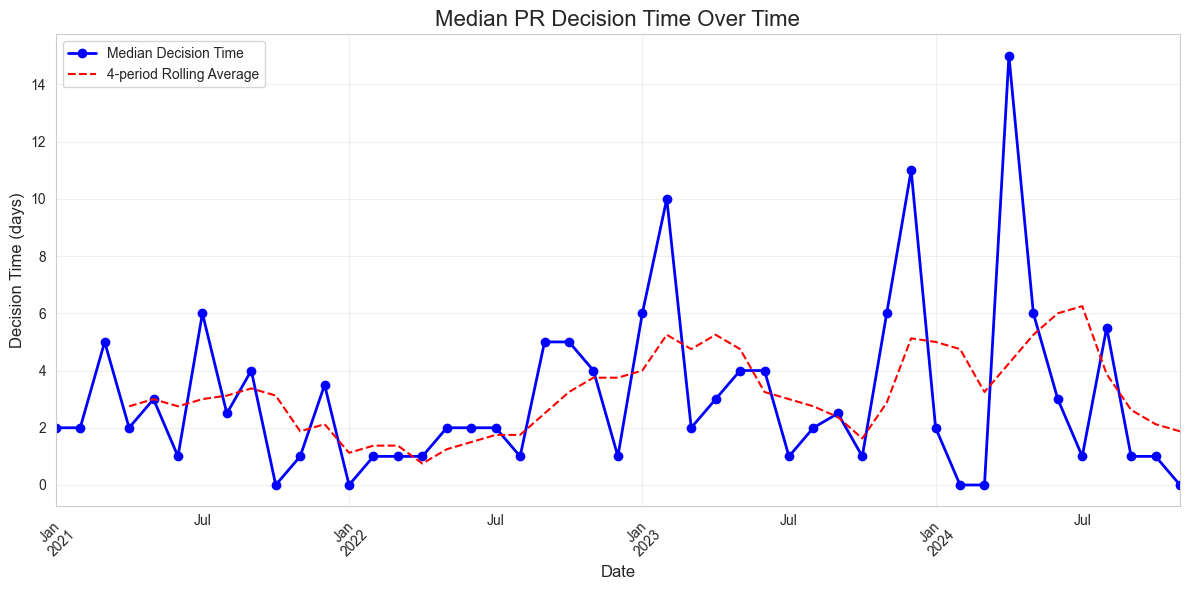

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/pull_requests_filtered.csv")

resample_freq = 'M'  # Monthly aggregation
df = df.copy()
df['Created At'] = pd.to_datetime(df['Created At'])

# Ensure 'Decision Time' is numeric
df['Decision Time'] = pd.to_numeric(df['Decision Time'], errors='coerce')

# Compute median decision time per period
decision_time_trend = df.set_index('Created At').resample(resample_freq)['Decision Time'].median()

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot decision time over time
ax = decision_time_trend.plot(kind='line', marker='o', linewidth=2, color='blue', label='Median Decision Time')

# Add a trend line (rolling average)
window_size = max(3, len(decision_time_trend) // 10)  # Adaptive window size
if len(decision_time_trend) > window_size:
    rolling_avg = decision_time_trend.rolling(window=window_size).mean()
    rolling_avg.plot(ax=ax, color='red', linestyle='--', label=f'{window_size}-period Rolling Average')

# Set title and labels
plt.title('Median PR Decision Time Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Decision Time (days)', fontsize=12)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Tight layout to ensure everything fits
plt.tight_layout()

# Save figure (optional)
# plt.savefig('../plot-images/decision_time_trend.png')

plt.show()